## <p style="text-align: center;">MIS 285N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Problem Set 3: Machine Learning Experiments</p>
## <p style="text-align: center;">Total points: 10</p>
## <p style="text-align: center;">Due: Friday, 30th September submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

In this Problem Set we will solve the Unsupervised problem using k-means clustering algorithm. 

## Task 1
Read the wine data from the link provided below. 
Split the wine data into X and y. The X should have the features associated with each class of wine. The y should indicate the type of wine. 

Peform PCA and extract the top two components. 

Generate a scatter plot for the 2 components generated by PCA. Do they appear to be in clusters of 3? 

The reference plot is given below. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


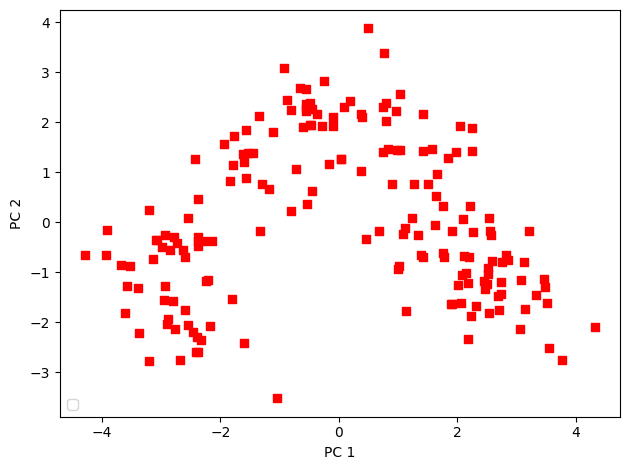

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)
## your code here
X, y = df_wine.iloc[:, 1:], df_wine.iloc[:, 0]

sc = StandardScaler()
X_std = sc.fit_transform(X)

pca = PCA(n_components=2)
PCA_X_std=pca.fit_transform(X_std)

plt.scatter(PCA_X_std[:, 0], 
     PCA_X_std[:, 1], 
     c='red', marker='s')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig('Blobs2.png', dpi=300)
plt.show()

In [ ]:
from IPython.display import Image
Image(filename=r'Blobs.png')

## Task 2
Run a k-means clustering model for the input data. This should generate the cluster centoids. Perform this for a value of k=3 and plot the cluster centroid vs. data points in that cluster as a scatter plot. 

To check how well k-means performed, print the prediction accuracy and plot the confusion matrix. 
It is not straightforward to print the accuracy score. Make sure to match the predicted wine class to the original wine class and then print the accuracy. 

Reference plot is given below: 

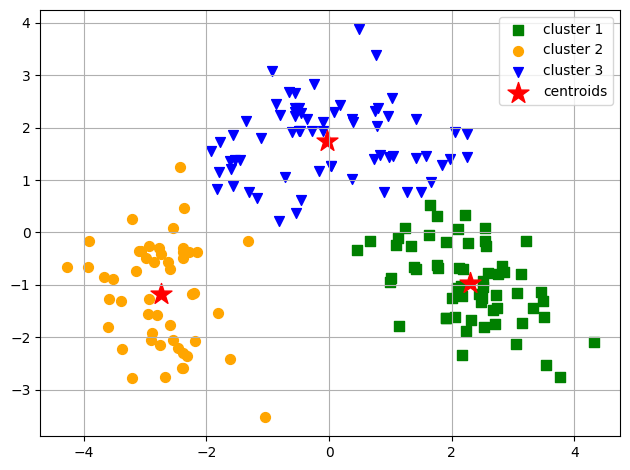

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, # how many clusters
            init='random', # try 'k-means++' instead of 'random'
            n_init=10,    # 10 runs of the k-means algorithm, each run starts with a different
                          # set of 3 centroids; choose the one that has the lowest SSE
            max_iter=300, # each run is capped at 300 iterations OR
            tol=1e-04,    # tolerance of 0.0001 is reached 
            random_state=0)
y_km = km.fit_predict(PCA_X_std)

plt.scatter(PCA_X_std[y_km == 0, 0],
            PCA_X_std[y_km == 0, 1],
            s=50,
            c='green',
            marker='s',
            label='cluster 1')
plt.scatter(PCA_X_std[y_km == 1, 0],
            PCA_X_std[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(PCA_X_std[y_km == 2, 0],
            PCA_X_std[y_km == 2, 1],
            s=50,
            c='blue',
            marker='v',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('centroids2.png', dpi=300)
plt.show()

In [ ]:
Image(filename=r'centroids.png')

In [ ]:
# Confusion matrix
for i in range(len(y_km)):
    if y_km[i] == 0:
        y_km[i] = 1
    elif y_km[i] == 1:
        y_km[i] = 3
        
from sklearn.metrics import accuracy_score        
from sklearn.metrics import confusion_matrix

print('Misclassified samples: %d' %(y != y_km).sum())
print('Accuracy: ', accuracy_score(y, y_km))

print('Confusion Matrix:')
print(confusion_matrix(y, y_km))

Misclassified samples: 6
Accuracy:  0.9662921348314607
Confusion Matrix:
[[58  1  0]
 [ 3 66  2]
 [ 0  0 48]]


In [ ]:
Image(filename=r'confusion.png')

## Task 3

Run the KMeans model for different values of $k$ and plot the distortions in each case and identify the elbow of the curve for PCA'ed dataset with n=2 components. 

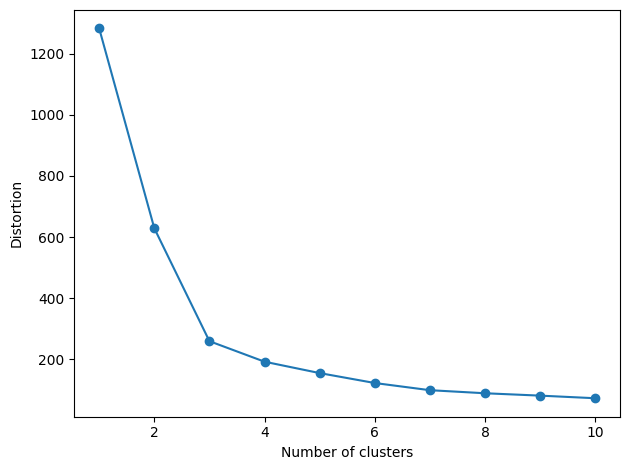

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(PCA_X_std)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.savefig('elbow2.png', dpi=300)
plt.show()

In [ ]:
Image(filename=r'elbow.png')